In [4]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

In [1]:
import pathlib
pathlib.Path()


PosixPath('.')

In [2]:
CURRENT_DIR = pathlib.Path().resolve()  # Path local completo
CURRENT_DIR

PosixPath('/home/santi/personalProjects/ML_con_sklearn/ejemplos/examples/notebook')

In [5]:
df = pd.read_csv(CURRENT_DIR.parent.joinpath("data", "candy.csv"))
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [9]:
X = df.drop("competitorname", axis=1)
miniBatchKMeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)

In [12]:
print("El numero de clusters para nuestros datos es: ", len(miniBatchKMeans.cluster_centers_)) 
print("arreglo de predicciones para cada caramelo ", miniBatchKMeans.predict(X)) 


El numero de clusters para nuestros datos es:  4
arreglo de predicciones para cada caramelo  [1 1 0 2 2 2 1 0 0 0 0 0 0 2 0 2 0 2 1 0 2 2 1 1 1 1 0 1 3 2 0 2 3 1 2 1 3
 1 1 2 1 1 3 1 0 0 2 3 0 2 0 3 3 3 3 0 1 0 2 0 1 1 0 2 3 1 1 2 1 0 0 0 0 1
 2 2 2 2 2 3 2 0 2 2 2]


In [13]:
#agregamos la columna con el valor del cluster para cada dato
df["meanshift"] = miniBatchKMeans.labels_
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


Utilize PCA para tener mi dataset en 2 dimensiones para que me sea facil graficarlo,
y con meanshift.cluster_centers_ me devuelven las coordenadas de un centroide, al final bota el grafico de los puntos y como se dividen
NOTA: como baje mi dataset a 2 dimensiones supongo que perdi mucha informacion, por eso esto es mas algo ludico para entender mejor lo que hacemos


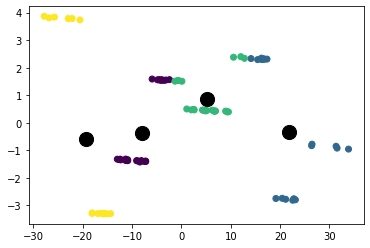

In [15]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
    
miniBatchKMeans = MiniBatchKMeans(n_clusters=4).fit(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=miniBatchKMeans.predict(pca_data))
plt.scatter(miniBatchKMeans.cluster_centers_[:, 0], miniBatchKMeans.cluster_centers_[:, 1], c='black', s=200)
plt.show()